In [1]:
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
import numpy as np

In [2]:
def mass_spring_forced(f, m, k):
    def mass_spring(t, y):
        dy0dt = y[1]
        dy1dt = ( f(t) - k * y[0] ) / m
        return [dy0dt, dy1dt]
    return mass_spring

def random_force(t, Fs):
    n = int((t[1] - t[0]) * Fs) + 1
    return interp1d(np.linspace(t[0], t[1], n), np.random.rand(n))

def step_function(gain, raise_time=0):
    def step(x):
        return gain * np.sign(x - raise_time)
    return step

def sine_wave(freq, t, Fs):
    n = int((t[1] - t[0]) * Fs) + 1
    t_eval = np.linspace(t[0], t[1], n)
    return interp1d(t_eval, np.sin(t_eval * freq))

In [8]:
Fs = 1000
t = [0, 10]
t_eval = np.linspace(t[0], t[1], int((t[1] - t[0]) * Fs) + 1)
f = sine_wave(31.622, t, Fs)
#f = random_force(t, Fs)
#f = step_function(10)
m = 0.1
k = 100

In [9]:
sol = solve_ivp(mass_spring_forced(f, m, k), t, [0, 0], t_eval=t_eval)

In [10]:
import matplotlib.pyplot as plt

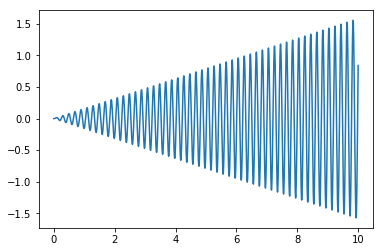

In [11]:
plt.plot(sol.t, sol.y[0])

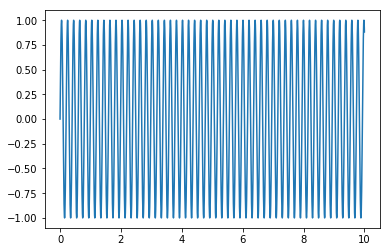

In [12]:
plt.plot(sol.t, f(sol.t))